# Why People Really Quit Their Jobs?

![peces](http://4.bp.blogspot.com/-7_FVudvkdV4/Tt3pP5uQ_qI/AAAAAAAAAek/yIBC0K4DGSk/s1600/peces_nadando_en_el_agua_de_las_peceras.jpg)


### This dataset is related to the record of the employees in a company.

* It describes the **satisfaction level** of the employee, **last evaluation** of their performance, **number of projects** they done, their **average monthly working hours**, the **number of years** spent in the company, whether the employee had a **workplace accident**, whether the employee **left the workspace** , their **last promotion**, the **department** where the employee works and the **salary level**.

### In this notebook I will try to find out the main reasons about why people left their jobs.  

* As I aforementioned, the company should be interested to know why and what people is leaving their jobs

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import altair as alt
from vega_datasets import data
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# 2. Load Data

For the analysis it will be used a popular dataset called: "HR_comma_sep.csv". From now on : "HR_data_origin.csv". 

In [2]:
hr=pd.read_csv("data/HR_data_origin.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Brief description of columns in DataSet:

- **Satisfaction_level** : Level of employee satisfaction with their work and position. At first, it ties closely with employee turnover. 

- **Last_evaluation**: Column can be used to evaluate the performance of an employee. The data ranges from 0–1, 0 being low performance and 1 being the highest.

- **Number_projects**: number of projects employees done.

- **average_montly_hours**: average monthly hours per employee.

- **time_spend_company**: The data ranges from 1 to 10. Data unit not specified. It will be supposed _years_.

- **Work_accident**: Whether the employee had a workplace accident,: 1 yes, 0 no.

- **left**: Whether the employee has left or not the company: 1 yes, 0 no.

- **promotion_last_5years**: Whether the employee has had a promotion in the last 5 years.

- **Sales**: It seems to indicate the different areas or departments the employees belong: Sales, Technical, Support, IT, Product Managment, Marketing ,Accounting, Human Resources, Managment and Others.

- **Salary**: Salary level classified by Low, Medium, High.

# 3. Data Scrubbing 

Analize and understand the data in detail in order to make the right assumptions and choose the right algorithm:

* Size 
* Determine variable's type
* Some transformations: name of columns and type of the variables
* Is there any null value?
* Find and remove duplicates
* Descriptive analysis

In [3]:
#This dataset contains 14999 rows and 10 columns.
hr.shape

(14999, 10)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
9720,0.53,0.97,4,254,3,0,0,0,sales,low
2866,0.65,0.99,4,200,4,0,0,0,technical,low
13450,0.82,0.85,3,214,2,0,0,0,support,high
2340,0.48,0.55,3,228,2,0,0,0,support,low
6306,1.00,0.81,3,168,4,0,0,0,support,low
7260,0.99,0.86,4,196,2,1,0,0,marketing,high
6732,0.91,0.71,5,156,3,0,0,0,sales,low
12797,0.90,0.93,4,263,3,1,0,0,support,medium
2475,0.32,0.42,2,99,4,0,0,0,technical,low
8982,0.47,0.44,5,255,5,1,0,0,support,low


__Rename columns:__ 

* __"sales"__: seems to indicate the names of the departments in the company. To clarify, from now on "sales" column  will be called "department"
* __"Work_accident"__ : it will be converted to lowercase letters
* __"average_montly_hours"__ : it will be renamed correctly: average_monthly_hours

In [6]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
hr_renamed =hr.rename(columns={'Work_accident':'work_accident','sales':'department','average_montly_hours':'average_monthly_hours'})

In [8]:
hr_renamed.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

__Is there any missing data?__

In [9]:
hr_renamed.isnull().sum()
#there isn't missing data

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
hr_renamed.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


__Find and remove duplicates__

In [11]:
len(hr_renamed[hr_renamed.duplicated]==True)

3008

In [12]:
#After validating the size of these elements I feel comfortable removing duplicates from the data set
hr_no_dupl= hr_renamed.drop_duplicates()
hr_no_dupl.shape

(11991, 10)

In [13]:
#Descriptive analysis
hr_no_dupl.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


It is observed that:
    
* Satisfaction level is around 63% and last evaluation(performance) is around 72%
* Almost the 17% of employees left the company
* Employees work 200 hours monthly and in average on 4 projects, spending  3 years at company in average
* Accidents happen in a 15% of times and promotions seems to be very low

# 4. Analysis and some Quick Visualitations

### Job distribution
_How many employees work in each department?_

Due to we unknow what this company is dedicated to, this analysis can be useful to determine the type of company segment.

In [14]:
headcount_by_department = hr_no_dupl.groupby('department')['left'].count().sort_values(ascending=False).reset_index()
headcount_by_department

,department,left
0,sales,3239
1,technical,2244
2,support,1821
3,IT,976
4,RandD,694
5,product_mng,686
6,marketing,673
7,accounting,621
8,hr,601
9,management,436


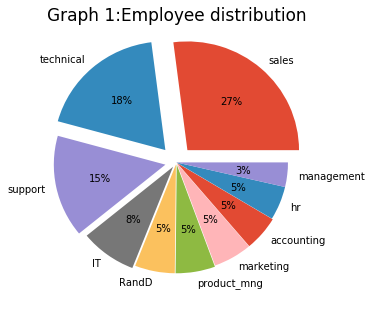

In [15]:
#graph:

plt.figure(figsize=(5,5))
explode=(0.15,0.15,0.1,0.05,0.02,0.02,0.01,0.01,0,0) #highlight the 4 main values
plt.pie(headcount_by_department.left,labels=headcount_by_department.department,autopct='%1d%%',explode=explode)
plt.title('Graph 1:Employee distribution',fontsize=17)
plt.show()

* Sales, Technical and Support are the departments with a higher number of employees (50% over total)

## Turnover rate

The term ‘employee turnover rate’ refers to the percentage of employees who leave an organization during a certain period of time. People usually include voluntary resignations, dismissals, non certifications and retirements in their turnover calculations. They normally don’t include internal movements like promotions or transfers. 

Source: [https://resources.workable.com/tutorial/calculate-employee-turnover-rate]

### Which is the turnover rate of this company?

Typically, turnover is measured on a month or annual basis. As a general rule, high rate is damaging to a company's revenue and profitability. As I unknow the period of time of this dataset, I will assume that it has been measured on annual basis. 

Here is the formula for annual turnover rate:

![image.png](https://www.brighthr.com/media/112089/how-to-calculate-staff-turnover-by-year.jpg)

To simplify, let's calculate the turnover rate as:

In [16]:
turnover_rate = round(hr_no_dupl['left'].mean()*100,1)
turnover_rate

16.6

So, I can determine that 17% of the employees left the company. Is it high, is it low, is it bad, is it good...?
Well, the ideal labour turnover will depend on the business and the industry the company work in. 

I have no enough information about the company and it seems not easy to discover it.  However what I can and try to find out and analyse is : __What are people leaving the company like and why they do it?__ 

### Which is the turnover rate by department?

In [17]:
turnover_by_department = round(hr_no_dupl.groupby('department')['left'].mean().sort_values(ascending=False)*100,1)
turnover_by_department

department
hr             18.8
accounting     17.6
technical      17.4
support        17.1
sales          17.0
marketing      16.6
IT             16.2
product_mng    16.0
RandD          12.2
management     11.9
Name: left, dtype: float64

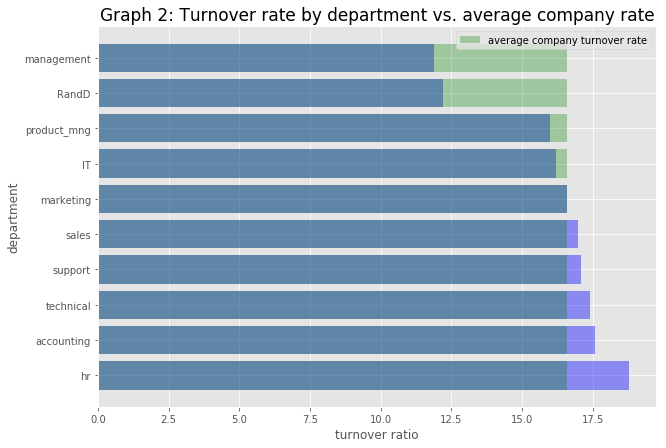

In [18]:
#this graph shows turnover ratio by department vs. Company ratio (16.6%)

plt.figure(figsize=(10,7))
plt.barh(turnover_by_department .index,turnover_by_department.values,color='blue',alpha=0.4)
plt.barh(turnover_by_department.index,turnover_rate,alpha=.3,color='green', label='average company turnover rate')
plt.xlabel('turnover ratio')
plt.ylabel('department')
plt.legend()
plt.title('Graph 2: Turnover rate by department vs. average company rate', fontsize= 17)
plt.show()

* Human Resources is the department with the highest turnover rate. 

* The departments with a higher number of employees (Sales, Technical and Support) are also above the average.

* Management is far below the average, probably (don't know yet) because their salaries are higher.

### Turnover by salary

__Could salary be a strong reason to leave the job?__

In [19]:
turnover_by_salary= round(hr_no_dupl.groupby('salary')['left'].mean()*100,1).sort_values(ascending=False).reset_index()
turnover_by_salary

,salary,left
0,low,20.5
1,medium,14.6
2,high,4.8


* As expected, the lower the salary, the greater the turnover.

__Who has the lowest salaries?__

In [20]:
#There are two well differenciated groups of employees
hr_no_dupl.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


In [21]:
#Definitions:
people_who_stay= hr_no_dupl[hr_no_dupl['left']==0] #people who stay 
people_who_leave= hr_no_dupl[hr_no_dupl['left']==1] #people who leave

In [22]:
#How many are there?
print("number of employees who left: ",len(people_who_leave))
print("number of employees who stayed: ",len(people_who_stay))

number of employees who left:  1991
number of employees who stayed:  10000


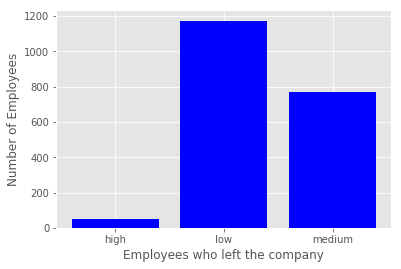

In [23]:
#salaries of people who left
salary_people_who_left= people_who_leave.groupby('salary')['left'].count().reset_index()
#graph:
plt.bar(salary_people_who_left.salary, salary_people_who_left.left,color='blue')
plt.xlabel('Employees who left the company')
plt.ylabel('Number of Employees')
plt.show()

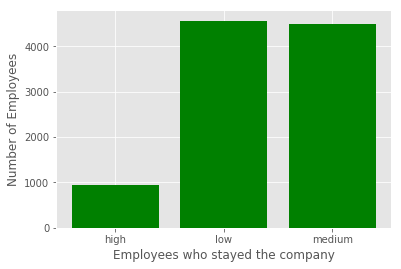

In [24]:
#salaries of people who stay
salary_people_who_stayed = people_who_stay.groupby('salary')['left'].count().reset_index()
#graph:
plt.bar(salary_people_who_stayed.salary, salary_people_who_stayed.left,color='green')
plt.xlabel('Employees who stayed the company')
plt.ylabel('Number of Employees')
plt.show()

* Salaries are lower in people who left so, definitely, it could be a reason for leaving.

__Having a look people who left by department ...__

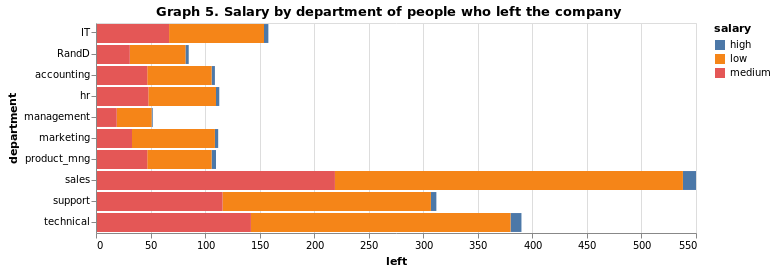

In [25]:
alt.Chart(people_who_leave.groupby(['salary','department'])['left'].count().reset_index()).mark_bar().encode(
    x="left",
    y="department",
    color='salary'
).properties(
    title="Graph 5. Salary by department of people who left the company",
    width=600
).interactive()

+ Sales, Support and Technical are the departments that most employees leave the company

__Which is the department with the lowest & highest salary?__

+ Sales have the lowest salary volume and it is the department with more people who left. There are some people highly paid probably due to sales commisions (as higher sales reached, more money paid)

### Could we know which variable has the most influence to stay or leave a job?

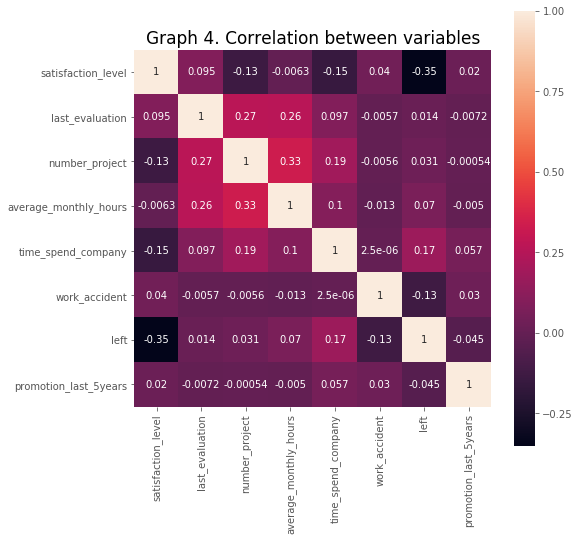

In [26]:
# Correlation heatmap
plt.figure(figsize=(8, 8)) 
sns.heatmap(hr_no_dupl.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 4. Correlation between variables", fontsize = 17)
plt.show()

#### Graph 4:  

* As expected, the __"satisfaction level"__ has the __largest correlation with the decision to stay or leave__ the company and it is negative (-0.35) 


* The correlation with the attribute **"Work_accident"** is also **negative(-0.13)** whereas with **"time_spend_company" it is positive (0.17)**

### Let's start by taking a look at the distribution of employees satisfaction level at company

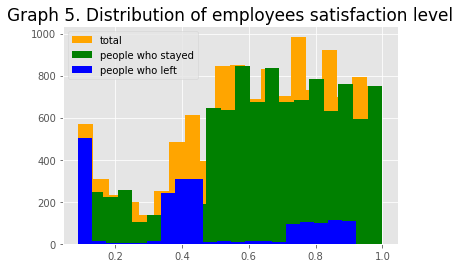

The average satisfaction level at company is 63%
    - for employees who left is 44%
    - for employees who stayed is 67%


In [28]:
#Graph:
plt.hist(hr_no_dupl.satisfaction_level,bins=20,color='orange',label='total') 
plt.hist(people_who_stay.satisfaction_level,bins=20,color='green',label='people who stayed',) #people who stay
plt.hist(people_who_leave.satisfaction_level,bins=20,color='blue',label='people who left') #people who leave
plt.title("Graph 5. Distribution of employees satisfaction level", fontsize = 17)
plt.legend()
plt.show()

print('The average satisfaction level at company is %.f'%(hr_no_dupl.satisfaction_level.mean()*100) + '%') 
print('    - for employees who left is %.f' %(people_who_leave.satisfaction_level.mean()*100) + '%')
print('    - for employees who stayed is %.f' %(people_who_stay.satisfaction_level.mean()*100) + '%')

For __people who leave the company__ (blue color) there are three different scenarios:
* 0         -> staff totally disappointed (the biggest group)
* around 0,4-> group with satisfaction level below the average
* 0.7-0.9   -> with high satisfacion and above the average 

It seems clear to think that employees who were disappointed in the company left (employees with a satisfaction level below the mean) but, what happens to those who were happy in the company, why do they left?

### Time spend at company

In [117]:
time_spend = hr_no_dupl.groupby(['time_spend_company', 'left']).size()
time_spend

time_spend_company  left
2                   0       2879
                    1         31
3                   0       4316
                    1        874
4                   0       1510
                    1        495
5                   0        580
                    1        482
6                   0        433
                    1        109
7                   0         94
8                   0         81
10                  0        107
dtype: int64

In [118]:
#in order to see it clearly,  I will use % of employees  base 100 for each year
time_spend_percentaje=time_spend.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percentaje

,time_spend_company,left,0
0,2,0,0.989347
1,2,1,0.010653
2,3,0,0.831599
3,3,1,0.168401
4,4,0,0.753117
5,4,1,0.246883
6,5,0,0.546139
7,5,1,0.453861
8,6,0,0.798893
9,6,1,0.201107


In [119]:
#change the name of columns
time_spend_percentaje.columns = ['time_spend_company', 'left', '%_Employee'] 
time_spend_percentaje

,time_spend_company,left,%_Employee
0,2,0,0.989347
1,2,1,0.010653
2,3,0,0.831599
3,3,1,0.168401
4,4,0,0.753117
5,4,1,0.246883
6,5,0,0.546139
7,5,1,0.453861
8,6,0,0.798893
9,6,1,0.201107


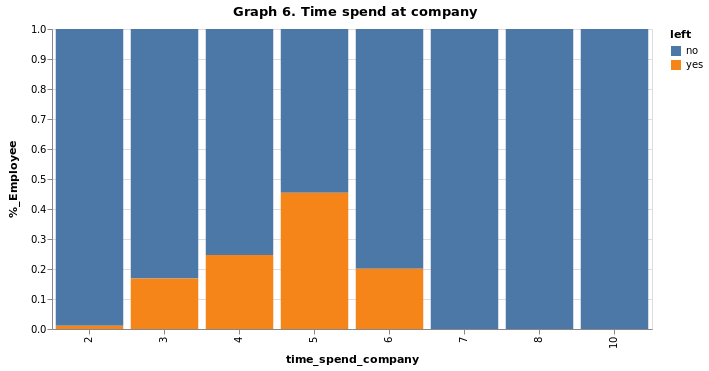

In [125]:
#legend:
time_spend_percentaje['left']=time_spend_percentaje['left'].map({0:'no',1:'yes'})
#graph:
alt.Chart(time_spend_percentaje.reset_index()).mark_bar().encode(
    x="time_spend_company:N",
    y="%_Employee:Q",
    color="left:N"
).properties(
    title="Graph 6. Time spend at company",
    width=600
).interactive()

It is remarkable that:

* employees working more than 6 years didn't leave. 
* ten years is the maximum value so it could indicate it is a young company

During the first two years of experience, employees barely leave the company. After that, the proportion of people leaving the company is older and older.  As the employees experience grows and passed the 6 year, they stop leaving. 

### Number of projects analysis

In [153]:
#I will do the same analysis as before (base 100):
number_projects = hr_no_dupl.groupby(['number_project', 'left']).size()
number_projects_percentaje = number_projects.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
#change the name of columns
number_projects_percentaje.columns = ['time_spend_company', 'left', '%_Employee'] 
number_projects_percentaje

,time_spend_company,left,%_Employee
0,2,0,0.458281
1,2,1,0.541719
2,3,0,0.989205
3,3,1,0.010795
4,4,0,0.935685
5,4,1,0.064315
6,5,0,0.846395
7,5,1,0.153605
8,6,0,0.550847
9,6,1,0.449153


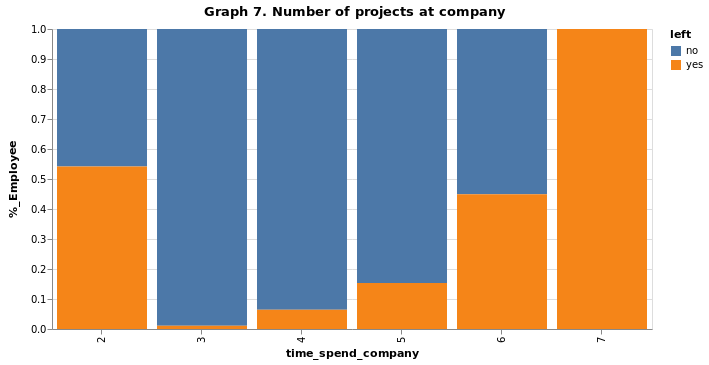

In [154]:
#legend:
number_projects_percentaje['left']=number_projects_percentaje['left'].map({0:'no',1:'yes'})
#graph:
alt.Chart(number_projects_percentaje.reset_index()).mark_bar().encode(
    x="time_spend_company:N",
    y="%_Employee:Q",
    color="left:N"
).properties(
    title="Graph 7. Number of projects at company",
    width=600
).interactive()

Analysing the number of projects at company, I realize that:

* After the two first years at company, it seems that from 3 projects people start being overworked and the turnover rate starts to grow. So, it seems to be also a strong reason to leave the company.


* Most of people who remain at company done among 3-5 projects.


* Everybody with 7 projects counts left the company, probably they were overworked.


* Above 50% people with 2 projects left the company, probably they worked hard and weren't well paid or not highly valuated. Let's check it!!!


In [151]:
#On one hand, the performance of employees who left the company and worked on 2 projects count is undervalued

print('The performance of employees who left and worked on 2 projects count is %.f'%(people_who_leave[(people_who_leave['number_project'] ==2)]['last_evaluation'].mean()*100) + 
      '%, well below the company average '+
      '(%.f'%(hr_no_dupl.last_evaluation.mean()*100)+'%)') 


The performance of employees who left and worked on 2 projects count is 52%, well below the company average (72%)


In [152]:
#On the other hand, the salary is neither good enough:

print('Most of people who left the company and was worked in two projects were not well paid')
print(people_who_leave[people_who_leave['number_project'] ==2].groupby(['salary'])['salary'].count())

Most of people who left the company and was worked in two projects were not well paid
salary
high       23
low       512
medium    322
Name: salary, dtype: int64


### Promotions at company

In [225]:
print('there had been %.f'%(hr_no_dupl[hr_no_dupl['promotion_last_5years']==1]['left'].count())+' promotions in total')

there had been 203 promotions in total


In [213]:
#Promotions breakdown by type of employees:
hr_no_dupl.groupby(['left'])['promotion_last_5years'].sum()

left
0    195
1      8
Name: promotion_last_5years, dtype: int64

There are scarce promotions in company and most of them were to people who stayed at company. It makes sense

__How is this promotions distribution along time?__

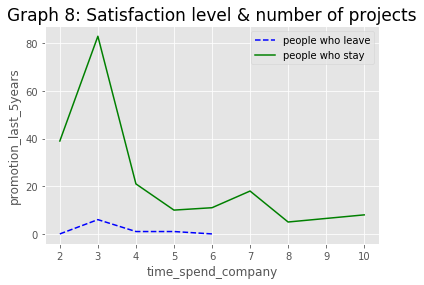

In [222]:
#Graph:
plt.plot(people_who_leave.groupby('time_spend_company')['promotion_last_5years'].sum(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['promotion_last_5years'].sum(),'green',label='people who stay')
plt.ylabel('promotion_last_5years')
plt.xlabel('time_spend_company')
plt.legend()
plt.title('Graph 8: Satisfaction level & number of projects', fontsize = 17)
plt.show()

### Satisfaction level vs. number of projects

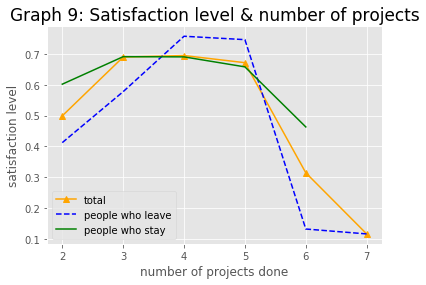

In [226]:
#Graph:
plt.plot(hr_no_dupl.groupby('number_project')['satisfaction_level'].mean(),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('number_project')['satisfaction_level'].mean(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('number_project')['satisfaction_level'].mean(),'green',label='people who stay')
plt.ylabel('satisfaction level')
plt.xlabel('number of projects done')
plt.legend()
plt.title('Graph 9: Satisfaction level & number of projects', fontsize = 17)
plt.show()

Graph shows that the satisfaction level for people who left,  reach the maximum in the fourth and fifth project. After and before that , employees who left were not happy in the company

As I mentioned before, all people working in 7 projects left the company (no data for people who stayed).

### Satisfaction level vs. time spend at company



The level of satisfaction begins to decrease in the third year and worsens to 4.5 years, probably due to the fact that promotions are scarce.

TBD



### From the point of view of the company, which are the most valuables employees?

In [106]:
hr_no_dupl.mean()

satisfaction_level         0.629658
last_evaluation            0.716683
number_project             3.802852
average_monthly_hours    200.473522
time_spend_company         3.364857
work_accident              0.154282
left                       0.166041
promotion_last_5years      0.016929
dtype: float64

__DEFINITION__ : From a company view, the __most valuable employees__ will be those whom performance is over average (0.72), who had worked on at least 4 projects for a period of time exceeding 3 years

In [118]:
#DEFINITION: 

most_valuables_employees = hr_no_dupl[(hr_no_dupl['last_evaluation'] >0.716683) & (hr_no_dupl['number_project'] > 4)& (hr_no_dupl['time_spend_company']>3)]
most_valuables_employees.sample(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1147,0.83,0.95,5,258,5,0,1,0,technical,low
314,0.10,0.81,6,268,4,0,1,0,marketing,low
3173,0.93,0.77,5,106,5,0,0,0,technical,medium
776,0.10,0.97,6,254,5,0,1,0,sales,medium
1838,0.10,0.90,6,299,4,0,1,0,marketing,low


In [119]:
#How many are they?
print('The number of most valuable employees is %.f , that is a %.f'%(len(most_valuables_employees),len(most_valuables_employees)/len(hr_no_dupl)*100) + '% of total employees')

The number of most valuable employees is 1274 , that is a 11% of total employees


In [120]:
#How many have being promoted?
len(most_valuables_employees[most_valuables_employees['promotion_last_5years']==1])

14

In [121]:
#How many of these employees left the company?
len(most_valuables_employees[most_valuables_employees['left']==1])

807

In [122]:
#Which is the turnover rate for this kind of employees?
most_valuables_employees['left'].mean()*100

63.34379905808477

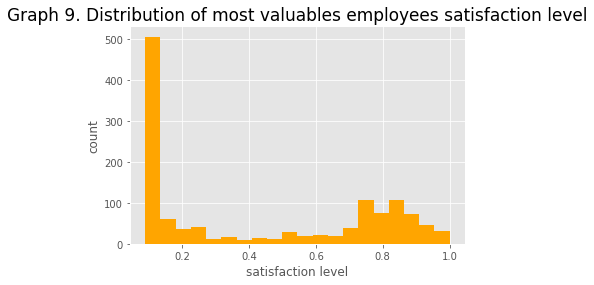

In [123]:
#Graph:
plt.hist(most_valuables_employees.satisfaction_level,bins=20,color='orange',label='total') 
plt.title("Graph 9. Distribution of most valuables employees satisfaction level", fontsize = 17)
plt.xlabel("satisfaction level")
plt.ylabel("count")
plt.show()

### Accidents

In [124]:
#Total Accidents in company
hr_no_dupl['work_accident'].sum()

1850

In [125]:
#How many accidents belong to each group of employees?
hr_no_dupl.groupby('left')['work_accident'].sum()

left
0    1745
1     105
Name: work_accident, dtype: int64

In [126]:
#There seem to be no significant differences between both groups in this regard
hr_no_dupl.groupby('work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,promotion_last_5years
work_accident,,,,,,,
0,0.625546,0.717092,3.805640,200.741150,3.364856,0.185978,0.015284
1,0.652200,0.714438,3.787568,199.006486,3.364865,0.056757,0.025946


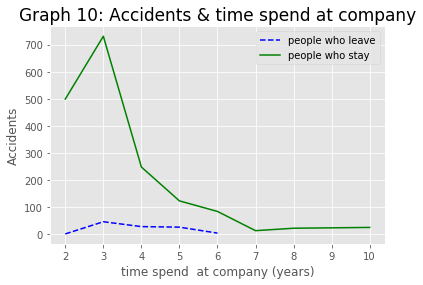

In [134]:
#How is the distribution over time? 
plt.plot(people_who_leave.groupby('time_spend_company')['work_accident'].sum(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['work_accident'].sum(),'green',label='people who stay')
plt.ylabel('Accidents')
plt.xlabel('time spend  at company (years)')
plt.legend()
plt.title('Graph 10: Accidents & time spend at company', fontsize = 17)
plt.show()

In [129]:
#What is the number of accidents split between people who stay and leave in the same period of time?
hr_no_dupl[hr_no_dupl['time_spend_company']<7].groupby('left')['work_accident'].sum()

left
0    1685
1     105
Name: work_accident, dtype: int64

In [118]:
#Which are the departments with more accidents?
hr_no_dupl.groupby('department')['work_accident'].sum().reset_index().sort_values(by='work_accident',ascending=False)

,department,work_accident
7,sales,498
9,technical,339
8,support,299
0,IT,139
1,RandD,119
6,product_mng,109
5,marketing,108
2,accounting,87
3,hr,80
4,management,72


In [119]:
#Focus on people who leave, which department has the greatest number of accidents? 

accidents= round(people_who_leave.groupby('department')['work_accident'].sum()/people_who_leave['work_accident'].sum()*100,2)
accidents.reset_index().sort_values(by='work_accident',ascending=False)

,department,work_accident
7,sales,29.52
9,technical,18.10
8,support,17.14
0,IT,6.67
1,RandD,6.67
2,accounting,4.76
3,hr,4.76
6,product_mng,4.76
4,management,3.81
5,marketing,3.81


### Some conclusions and next steps

..

# 5. Saving cleaned dataset

In [120]:
hr_no_dupl.to_csv('data/HR_data_cleaned.csv',index=False)